In [3]:
# SPDX-License-Identifier: (GPL-2.0+) 

import csv
import show_graphs as sg

In [4]:
trade_data = csv.DictReader(open('data/cow/Dyadic_COW_4.0_shortened.csv', 'r'))
trade_data = list(trade_data)
dispute_data = csv.DictReader(open('data/mid/MIDB_5.0.csv', 'r'))
dispute_data = list(dispute_data)

In [8]:
conflict_num = input("Enter a conflict number.  Type \"exit\" without the quotes to leave\n")
try:
    conflict_num = int(conflict_num)
except ValueError:
    print("Invalid conflict number")
    exit(0)

print("Parsing conflict number.")
instigatorsA, instigatorsB, sideA, sideB, start_year = sg.parse_conflict_num(dispute_data, conflict_num)

if int(start_year) == -1:
    print("Conflict number {0} does not exist".format(str(conflict_num)))
    exit(0)

print("Retrieving trade partners")
instigatorsA_trade_partners, instigatorsB_trade_partners = sg.get_conflict_trade_partners(
    trade_data,
    instigatorsA, 
    instigatorsB, 
    start_year
)
instigatorsA_trade_partners_unknown, instigatorsB_trade_partners_unknown = sg.get_conflict_trade_partners(
        trade_data,
        instigatorsA,
        instigatorsB,
        start_year,
        ignore_unknown = False
)

print("Parsing trade data for side A")
trade_valuesA = sg.parse_trade_data(trade_data, instigatorsA_trade_partners, start_year) if len(instigatorsA_trade_partners) > 1 else None
trade_valuesA_unknown = sg.parse_trade_data(trade_data, instigatorsA_trade_partners_unknown, start_year, ignore_unknown = False) if len(instigatorsA_trade_partners_unknown) > 1 else None

print("Parsing trade data for side B")
trade_valuesB = sg.parse_trade_data(trade_data, instigatorsB_trade_partners, start_year) if len(instigatorsB_trade_partners) > 1 else None
trade_valuesB_unknown = sg.parse_trade_data(trade_data, instigatorsB_trade_partners_unknown, start_year, ignore_unknown = False) if len(instigatorsB_trade_partners_unknown) > 1 else None

print("Calculating trade percentages for side A")
trade_percentagesA = sg.calculate_trade_percentages(trade_valuesA) if trade_valuesA is not None else None

print("Calculating trade percentages for side B")
trade_percentagesB = sg.calculate_trade_percentages(trade_valuesB) if trade_valuesB is not None else None


Enter a conflict number.  Type "exit" without the quotes to leave
621
Parsing conflict number.
Retrieving trade partners
Parsing trade data for side A
Parsing trade data for side B
Calculating trade percentages for side A
Calculating trade percentages for side B


In [9]:
print("Side A Summary:")
sg.show_summary(trade_percentagesA, sideA, instigatorsA)
print("Side B Summary:")
sg.show_summary(trade_percentagesB, sideB, instigatorsB)


Side A Summary:
Instigators: ['IRQ']
Combatants: ['IRQ']
No models available: no one joined instigators
Side B Summary:
Instigators: ['JPN', 'GMY', 'ITA']
Combatants: ['JPN', 'GMY', 'ITA']
No models available: no one joined instigators


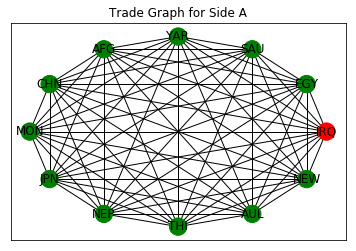

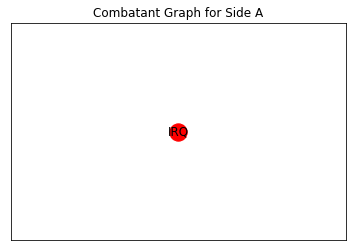

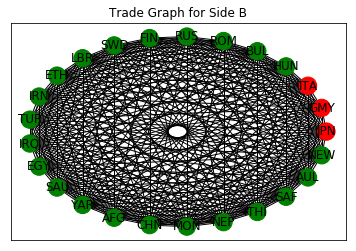

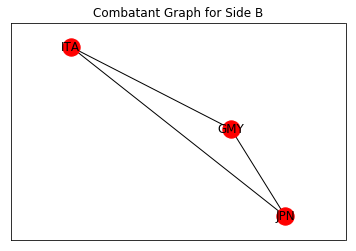

In [10]:
if trade_valuesA_unknown != None: sg.draw_trade_war_graphs(instigatorsA, sideA, trade_valuesA_unknown, 'A') 
if trade_valuesB_unknown != None: sg.draw_trade_war_graphs(instigatorsB, sideB, trade_valuesB_unknown, 'B')